Import packages

In [34]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize_scalar
from scipy import interpolate

Markov chain

In [3]:
mc = qe.markov.approximation.rouwenhorst(n=15,rho=0.98,sigma=1,mu=0.0)
print(mc)


<bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[8.68745813e-01 1.22852943e-01 8.06610233e-03 3.25903125e-04
  9.05286457e-06 1.82886153e-07 2.77100232e-09 3.19884827e-11
  2.82726489e-13 1.90388208e-15 9.61556606e-18 3.53188836e-20
  8.91891000e-23 1.38600000e-25 1.00000000e-28]
 [8.77521023e-03 8.69898113e-01 1.14147569e-01 6.91638853e-03
  2.56132057e-04 6.46751941e-06 1.17585664e-07 1.58359145e-09
  1.59954653e-11 1.21175363e-13 6.79985636e-16 2.74738104e-18
  7.56846090e-21 1.27414000e-23 9.90000000e-27]
 [8.86384872e-05 1.75611645e-02 8.70873733e-01 1.05420728e-01
  5.85411989e-03 1.97064862e-04 4.47815299e-06 7.23677913e-08
  8.52765233e-10 7.38289906e-12 4.66074941e-14 2.09230619e-16
  6.34016889e-19 1.16437860e-21 9.80100000e-25]
 [8.95338254e-07 2.66014944e-04 2.63551819e-02 8.71672375e-01
  9.66750886e-02 4.87959440e-03 1.47821263e-04 2.98573990e-06
  4.22174162e-08 4.26401260e-10 3.07628640e-12 1.55360075e-14
  5.23076548e-17 1.05668501e-19 

C:\Users\bayle\AppData\Local\Temp\ipykernel_23744\1588640207.py:1: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  mc = qe.markov.approximation.rouwenhorst(n=15,rho=0.98,sigma=1,mu=0.0)


Create grids

In [3]:
def create_grids(n, alpha, beta, delta, A):

    zero_grid=np.linspace(0, 1, n).reshape(-1,1)

    k_grid_1=np.zeros(shape=(n,1))

    k_grid_2=np.zeros(shape=(n,1))

    k_grid_3=np.zeros(shape=(n,1))

    k_grid_4=np.zeros(shape=(n,1))

    k_ss  = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
    
    #for i in range(len(new_grid)):
        #k_grid[i] =  low_bound + ( up_bound - low_bound ) * (new_grid[i] ** 1)

    for i in range(len(zero_grid)):
        k_grid_1[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 1)

    for i in range(len(zero_grid)):
        k_grid_2[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 1.5)

    for i in range(len(zero_grid)):
        k_grid_3[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 3)

    for i in range(len(zero_grid)):
        k_grid_4[i] =  (0.75 * k_ss) + ( (1.25 * k_ss) - (0.75 * k_ss) ) * (zero_grid[i] ** 4)

    return k_grid_1, k_grid_2, k_grid_3, k_grid_4

Utility

In [4]:
def u(c, gamma):
    if gamma == 1:
        return np.log(c)
    else:
        return (c ** (1 - gamma))/( 1 - gamma)

Production

In [49]:
def f(A, alpha, delta, k):
    return A * (k ** alpha) + (1 - delta) * k

# First, let us use VFI with a discrete grid as a review

In [31]:
def Tv(v, k, delta, toler, max_iter, alpha, A, beta, n, gamma):
    start_time = time.time()
    iter = 1
    error = toler+1
    v1=np.zeros(shape=(n,1))
    policy=np.zeros(shape=(n,1))
    while (toler<error) and (iter<max_iter):
        distance=np.zeros(shape=(n,1)) 
        for i in range(len(k)):
            vmax = -np.inf
            for j in range(len(k)): 
                c = f(A, alpha, delta, k[i]) - k[j] 
                if c>=0: 
                    v_temp = u(c, gamma)+beta*v[j]
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i=k[j]
                v1[i]=vmax 
                policy[i]=policy_i 
                distance[i]=np.abs(vmax-v[i]) 
        error=np.max(distance)       
        v=np.copy(v1) 
        if iter == 1:
            print(f"Iteration {iter}, Max Error: {error}") 
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time() 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy 

In [32]:
delta_values = [0.1,1]

Solve


iterating for delta = 0.1:
Iteration 1, Max Error: 0.03954985185889255
Iteration 10, Max Error: 0.015218534900998337
Iteration 20, Max Error: 0.00527995541380244
Iteration 30, Max Error: 0.0018375610177930324
Iteration 40, Max Error: 0.00064071790927267
Iteration 50, Max Error: 0.00022340452114932852
Iteration 60, Max Error: 7.786539836890372e-05
Iteration 70, Max Error: 2.714998564107285e-05
Iteration 80, Max Error: 9.46661464207299e-06
Execution time: 1.1826200485229492 seconds
Iteration 1, Max Error: 0.03954985185889255
Iteration 10, Max Error: 0.01522995604423577
Iteration 20, Max Error: 0.005277743510342936
Iteration 30, Max Error: 0.0018377301191322415
Iteration 40, Max Error: 0.0006407768712638484
Iteration 50, Max Error: 0.00022342507992445526
Iteration 60, Max Error: 7.790350834729898e-05
Iteration 70, Max Error: 2.7149497624223695e-05
Iteration 80, Max Error: 9.466444481132097e-06
Execution time: 1.1868081092834473 seconds
Iteration 1, Max Error: 0.03954985185889255
Iteratio

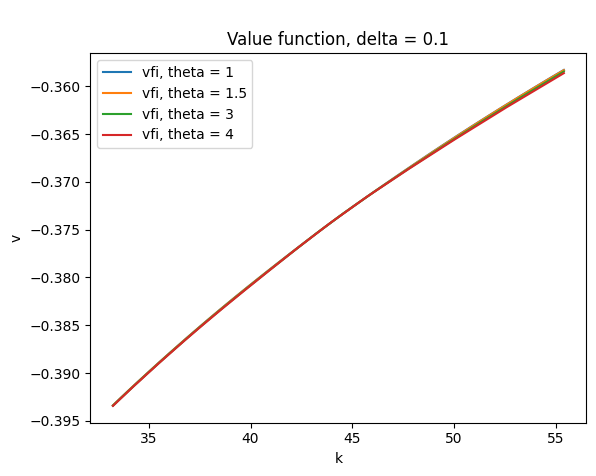

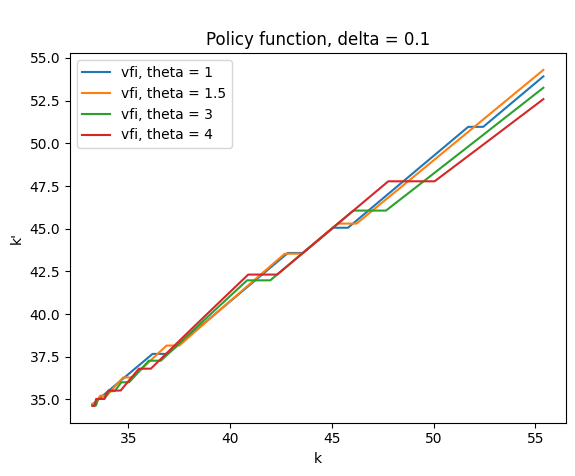


iterating for delta = 1:
Iteration 1, Max Error: 0.09139791889234186
Iteration 10, Max Error: 0.0350112078047915
Iteration 20, Max Error: 0.012207471636140554
Iteration 30, Max Error: 0.004256482167654507
Iteration 40, Max Error: 0.0014841435625313482
Iteration 50, Max Error: 0.0005174888622678786
Iteration 60, Max Error: 0.00018043720926474993
Iteration 70, Max Error: 6.291456466245293e-05
Iteration 80, Max Error: 2.1936952266154996e-05
Execution time: 1.3119757175445557 seconds
Iteration 1, Max Error: 0.09139791889234186
Iteration 10, Max Error: 0.035012723856293615
Iteration 20, Max Error: 0.012207485487332193
Iteration 30, Max Error: 0.004256486997266329
Iteration 40, Max Error: 0.001484145246512858
Iteration 50, Max Error: 0.0005174894494359705
Iteration 60, Max Error: 0.0001804374139975362
Iteration 70, Max Error: 6.291463604846115e-05
Iteration 80, Max Error: 2.1936977156800097e-05
Execution time: 1.3472936153411865 seconds
Iteration 1, Max Error: 0.09139791889234186
Iteration 

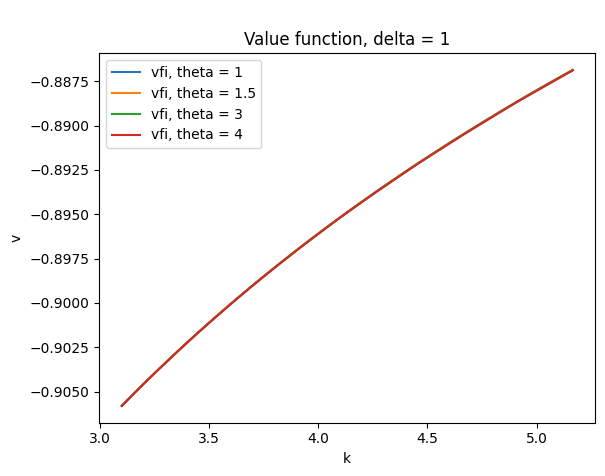

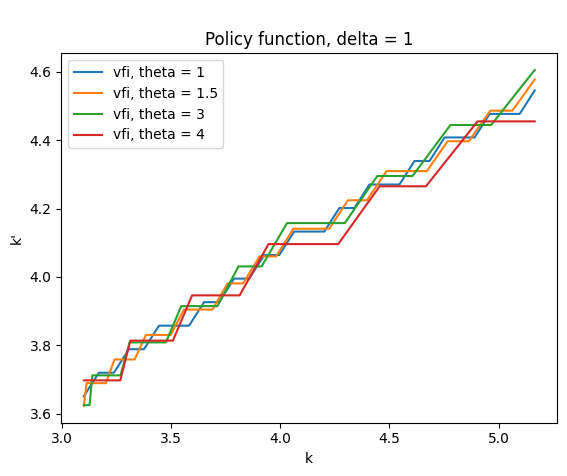

In [33]:
for delta in delta_values:
    if delta == 1:
        print(f"\niterating for delta = {delta}:")
        k_grid_1, k_grid_2, k_grid_3, k_grid_4 = create_grids(n=31, alpha=0.3, beta=0.9, delta=delta, A=10)  
        v_init = np.zeros(shape=(31,1))
        v_out_1, policy_out_1 = Tv(v_init, k_grid_1, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_2, policy_out_2 = Tv(v_init, k_grid_2, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_3, policy_out_3 = Tv(v_init, k_grid_3, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_4, policy_out_4 = Tv(v_init, k_grid_4, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        plt.plot(k_grid_1, v_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, v_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, v_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, v_out_4, label='vfi, theta = 4')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(k_grid_1, policy_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, policy_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, policy_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, policy_out_4, label='vfi, theta = 4')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()
    else:
        print(f"\niterating for delta = {delta}:")
        k_grid_1, k_grid_2, k_grid_3, k_grid_4 = create_grids(n=31, alpha=0.3, beta=0.9, delta=delta, A=10)     
        v_init = np.zeros(shape=(31,1))
        v_out_1, policy_out_1 = Tv(v_init, k_grid_1, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_2, policy_out_2 = Tv(v_init, k_grid_2, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_3, policy_out_3 = Tv(v_init, k_grid_3, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        v_out_4, policy_out_4 = Tv(v_init, k_grid_4, delta, 1e-5, 10000, 0.3, 10, 0.9, 31, 2)
        plt.plot(k_grid_1, v_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, v_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, v_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, v_out_4, label='vfi, theta = 4')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(k_grid_1, policy_out_1, label='vfi, theta = 1')
        plt.plot(k_grid_2, policy_out_2, label='vfi, theta = 1.5')
        plt.plot(k_grid_3, policy_out_3, label='vfi, theta = 3')
        plt.plot(k_grid_4, policy_out_4, label='vfi, theta = 4')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()

# Now, we interpolate

In [103]:
def T(toler, max_iter, beta, gamma, alpha, delta, A, n):

    V = np.zeros(shape=(n,1))

    V_new = np.zeros(shape=(n,1))

    G_kp = np.zeros(shape=(n,1))

    k, k2, k3, k4 = create_grids(n, alpha, beta, delta, A)

    for iter in range(max_iter):

        for i, k_i in enumerate(k):

            def F(kp, k_i, V_interp):
            # Objective Function
            # Calculate consumption for each kp
                c = f(A, alpha, delta, k_i) - kp
                # Minimise the negative of the Bellman with interpolated v(kp)
                return -u(c, gamma) - beta * V_interp(kp)
        
        # Interpolate the value function

            V_interp = interpolate.interp1d(np.squeeze(k), np.squeeze(V) , kind = 'cubic', fill_value = 'extrapolate')

            k_min = np.min(k)

            k_max = f(A, alpha, delta, k[i]) - 1e-8

            # Derivative of the objective function at the lower bound

            dF_min = -1

            # Derivative of the objective function at the upper bound

            dF_max = 1

            # Check for corner solutions
            # If the derivative at kp at the lower bound is negative, it suggests that the objective function is decreasing as kp approaches the lower bound
            # This can happen if the policy implied by the objective function is to reduce kp further.
            # So, the algorithm sets kp_min to k_min, this implies that if the optimisation algorithm is in a situation
            # where it seems beneficial to reduce kp below k_min based on the objective function, the algorithm starts the search from k_min.
            # The idea is to handle scenarios where the objective function might suggest a corner solution at the lower bound. 
            # Setting kp_min to k_min provides a starting point for the optimisation algorithm.

            # While kp_min and kp_max are indeed set to k_min and k_max respectively, they are used as initial guesses for the minimisation algorithm. 
            # However, these initial guesses do not restrict the search space of the algorithm; 
            # the algorithm is still free to explore values within the bounds specified in the bounds parameter of minimize_scalar.

            kp_min = k_min if dF_min < 0 else None

            kp_max = k_max if dF_max > 0 else None

            # Since we pass args=(k_i, V_interp), minimize_scalar will search in the kp direction to minimise F.
            # That is, it will find consumption for each kp, and calculate the Bellman using V_interp(kp)
            # Result will be of type OptimizeResult
            # To find the value, we use -result.fun, and result.x is the optimal value of kp which minimises the objective function.
            # Minimise_scalar uses two-sided derivatives

            result = minimize_scalar(F, bounds=(k_min, k_max), args=(k_i, V_interp), method='bounded')

            G_kp[i] = result.x

            V_new[i] = -result.fun
        
        #iter +=1

        if np.max((V_new - V)) < toler:
            break

        V = np.copy(V_new)

    # Plots

    a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))

    a1 = alpha / (1 - alpha * beta)

    plt.plot(k, a0 + a1 * np.log(k), label='exact')
    plt.plot(k, V_interp(k), label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Value function")
    plt.legend()
    plt.show()

    plt.plot(k, A * alpha * beta * k ** alpha, label='exact')
    plt.plot(k, G_kp, label='vfi')
    plt.xlabel('k')
    plt.ylabel("v")
    plt.title("Policy function")
    plt.legend()
    plt.show()


    return V, G_kp            


ChatGPT provides an explanation of k_min, k_max, kp_min and kp_max.

Here's a step-by-step clarification:

1. **Search Space Bounds:** The `minimize_scalar` function is instructed to search within the specified bounds `(k_min, k_max)`.

2. **Initial Guesses:** The initial guesses for the minimum are provided by `kp_min` and `kp_max`. These values serve as starting points for the optimization algorithm.

3. **Objective Function Evaluation:** The algorithm begins by evaluating the objective function at the initial guesses, i.e., at `kp_min` and `kp_max`. This involves calculating the objective function value, consumption, and discounted future value at these points.

4. **Derivatives:** The algorithm also calculates the derivatives of the objective function at these points (`dF_min` and `dF_max`). These derivatives guide the direction of the search.

5. **Search Process:** The optimization algorithm then iteratively adjusts the variable `kp` within the specified bounds, evaluating the objective function at various points and considering the derivatives. The algorithm aims to find the minimum of the objective function within the defined search space.

6. **Convergence:** The search process continues until the algorithm converges to a minimum or reaches the maximum number of iterations specified.

In summary, the search space is defined by `(k_min, k_max)`, but the optimization algorithm starts its search at the points given by `kp_min` and `kp_max`. These initial guesses help guide the algorithm toward the correct direction in the search space, potentially improving the efficiency of finding the minimum. The actual search, however, occurs within the specified bounds.

Further, I then asked ChatGPT if `k_min = kp_min`, and `k_max = kp_max`, since the above code seemed to imply so.

You've identified an important point, and I appreciate your attention to detail. You are correct in noting that in the provided code:

```python
dF_min = -1
kp_min = k_min if dF_min < 0 else None
```

The condition `dF_min < 0` is always `True` because `dF_min` is set to `-1`. Therefore, the `else None` part of the statement is never executed. In this specific case, `kp_min` will always be equal to `k_min`.

So, to clarify, the purpose of the `else None` part is to provide a fallback condition in case you want to handle situations where the assumption about the derivative at the lower bound is not met. However, in your current implementation, this condition is not reached because `dF_min` is always negative.

If you want to be explicit about the conditions, you could simplify the code like this:

```python
dF_min = -1
kp_min = k_min if dF_min < 0 else k_max
```

This ensures that `kp_min` is set to `k_max` if, for some reason, you want a different behavior when the assumption about the derivative is not met. If you're confident that the assumption will always hold, you can keep the existing code for simplicity.

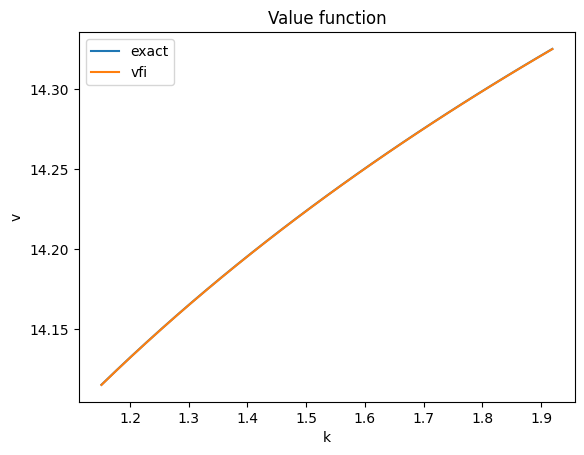

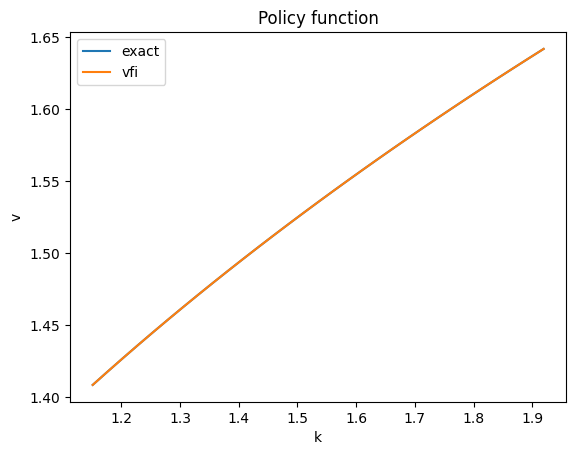

In [102]:
out_valu, out_poli = T(toler=1e-5, max_iter=10000, beta=0.9, gamma=1, alpha=0.3, delta=1, A=5, n=31)
